# Modeling 

 - For EDA and Feature Selection/Engineering, refer to <i>EDA_and_Preprocessing.ipynb</i>.
 - For defined functions, refer to <i>utility.py</i>.
 - For dependencies, refer to <i>requirements.txt</i>.
     - to download dependencies, access appropriate directory and run following code in terminal, <b>pip install 
-r requirements.txt </b>.
 - To learn more about deploying the model, refer to <i>App.py</i> (<b>Flask</b>) and <i>templates</i> (<b>HTML code</b>).

In [21]:
'''

Importing preprocessed dataframe (see utility.py for more information)

'''
from utility import homes
from utility import preprocessed_DF, num_feat

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [8.0, 5.0] # setting plotting settings for the remaining of the notebook
plt.rcParams['figure.dpi'] = 140 #setting pixels

In [3]:
homeDF = preprocessed_DF(homes) # preprocessed dataframe from utility.py (imputed, encoded, scaled)



In [4]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler


In [72]:
homeDF.info() # not scaled
#2580 rows × 181 features


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Columns: 181 entries, PID to _is_2.0
dtypes: float64(53), int64(2), uint8(126)
memory usage: 1.4 MB


In [75]:
num_features = X.select_dtypes(['float64','int64']).columns
num_features

Index(['GrLivArea', 'LotFrontage', 'LotArea', 'Neighborhood', 'Condition1',
       'Condition2', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'newBltRmd',
       'hasMasVnr', 'TotSft', 'UnfBsmt', 'NewGarage', 'HasWoodDk', 'HasPorch',
       'HasPool', 'PavedDrWay', 'HasBsmntType2'],
      dtype='object')

# Linear Regression (MLR) 
#### All Features Included (181 Features)

Train R2 Score is:  0.924467655240514
Test Score is:  0.9136697845247401


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

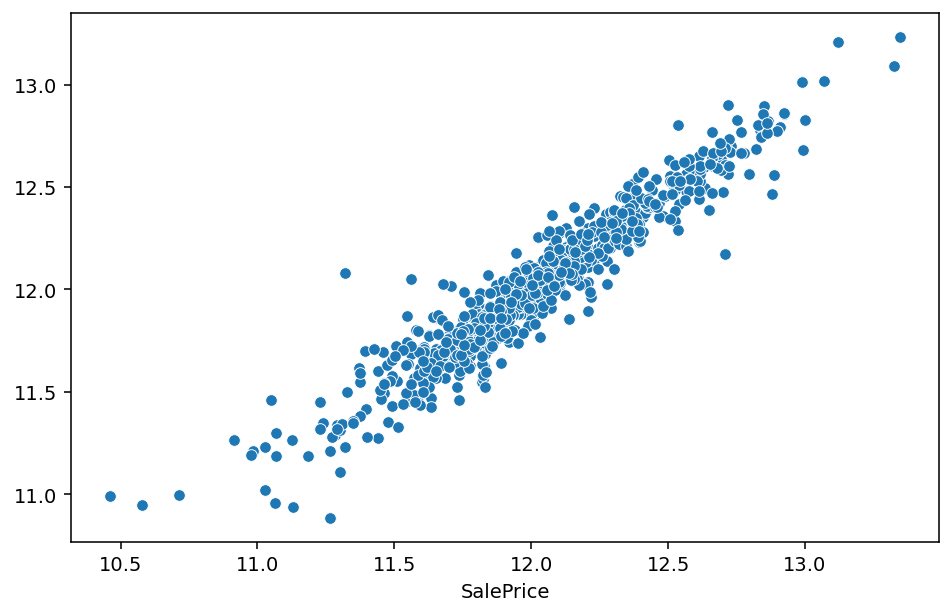

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, HuberRegressor
from sklearn.metrics import r2_score

ct = ColumnTransformer(
    [("scale", RobustScaler(), num_features)]) # num_feat -- > numerical features (EDA)



homeDF[num_features] = ct.fit_transform(homeDF)

y = np.log(homeDF['SalePrice']) # logging 
X = homeDF.drop(['PID', 'SalePrice'], axis = 1)
X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(X,y,test_size=.30, random_state=101)

mlr = LinearRegression()
mlr.fit(X_train_mlr, y_train_mlr)
print("Train R2 Score is: ", mlr.score(X_train_mlr, y_train_mlr))
y_pred_mlr = mlr.predict(X_test_mlr)
print("Test Score is: ", r2_score(y_test_mlr, y_pred_mlr))


sns.scatterplot(y_test_mlr, y_pred_mlr)
# sns.regplot(y_test_mlr, y_pred_mlr,);


In [83]:
X[num_features].corr()>60

,GrLivArea,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,newBltRmd,hasMasVnr,TotSft,UnfBsmt,NewGarage,HasWoodDk,HasPorch,HasPool,PavedDrWay,HasBsmntType2
GrLivArea,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
LotFrontage,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
LotArea,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Neighborhood,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Condition1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Condition2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
OverallQual,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
OverallCond,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
YearBuilt,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
YearRemodAdd,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


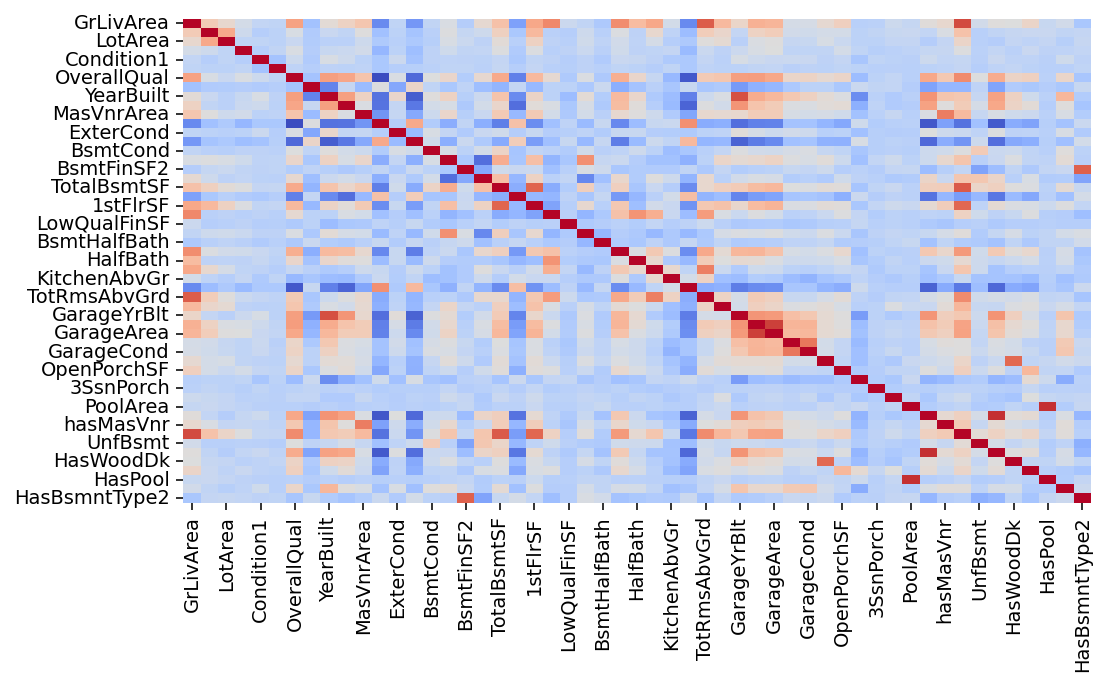

In [81]:
sns.heatmap(X[num_features].corr(),cmap="coolwarm", cbar=False, annot=False)
plt.tight_layout()

In [84]:
import statsmodels.api as sm


'''

Using statsmodels to run a linear regression model with all features to understand coefficients and significane
level of all features

'''
x_const_mlr=sm.add_constant(X_train_mlr)
model = sm.OLS(y_train_mlr, x_const_mlr)
ols = model.fit()
print(ols.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     119.3
Date:                Tue, 08 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:48:53   Log-Likelihood:                 1483.3
No. Observations:                1806   AIC:                            -2629.
Df Residuals:                    1637   BIC:                            -1699.
Df Model:                         168                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.8204      0.192     30.285

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Linear Regression (MLR)
#### Selecting top 30 Features based on EDA

In [87]:
pvalue = pd.DataFrame(ols.pvalues, columns=['PValue'])
reduced_features = list((pvalue[pvalue.PValue<0.04]).index)

In [93]:
X1 = homeDF[reduced_features[1:]]

'''

From 179 to 81 columns

'''
X_train_mlr2, X_test_mlr2, y_train_mlr2, y_test_mlr2 = train_test_split(X1,y,test_size=.30, random_state=101)

mlr2 = LinearRegression()
mlr2.fit(X_train_mlr2, y_train_mlr2)
y_pred_mlr2 = mlr2.predict(X_test_mlr2)
print("Train R2 Score is: ", mlr2.score(X_train_mlr2, y_train_mlr2))
y_pred_mlr2 = mlr.predict(X_test_mlr2)
print("Test Score is: ", r2_score(y_test_mlr2, y_pred_mlr2))



Train R2 Score is:  0.9126571445413628


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- 3SsnPorch
- BedroomAbvGr
- BsmtCond
- BsmtHalfBath
- BsmtQual
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 75 features, but LinearRegression is expecting 179 features as input.

In [50]:
homeDF.corr()[homeDF.corr()>.70]

,PID,GrLivArea,SalePrice,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,OverallQual,OverallCond,...,_is_Mod,_is_Sal,_is_Typ,_is_Attchd,_is_Basment,_is_BuiltIn,_is_CarPort,_is_Detchd,_is_1.0,_is_2.0
PID,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GrLivArea,NaN,1.000000,0.719981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SalePrice,NaN,0.719981,1.000000,NaN,NaN,NaN,NaN,NaN,0.790501,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_is_BuiltIn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
_is_CarPort,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
_is_Detchd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
_is_1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [45]:
homeDF['GrLivArea', ]

,PID,GrLivArea,SalePrice,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,OverallQual,OverallCond,...,_is_Mod,_is_Sal,_is_Typ,_is_Attchd,_is_Basment,_is_BuiltIn,_is_CarPort,_is_Detchd,_is_1.0,_is_2.0
0,909176150,-0.933977,126000,-0.385851,-0.367240,21.0,2.0,2.0,5.0,5.0,...,0,0,1,0,0,0,0,1,0,1
1,905476230,-0.623188,139500,-1.329573,-1.261484,7.0,2.0,2.0,4.0,4.0,...,0,0,1,1,0,0,0,0,0,0
2,911128020,-0.700483,124900,-0.429573,-0.814973,11.0,2.0,2.0,4.0,8.0,...,0,0,1,0,0,0,0,1,0,1
3,535377150,-0.639291,114000,0.570427,-0.304606,20.0,2.0,2.0,3.0,7.0,...,0,0,1,0,0,0,0,1,0,1
4,534177230,0.368760,227000,0.070427,-0.242461,17.0,2.0,2.0,7.0,5.0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,903205040,-0.779388,121000,-0.464242,-0.131384,3.0,2.0,2.0,5.0,5.0,...,0,0,1,0,0,0,0,1,0,1
2576,905402060,0.478261,139600,1.336627,1.049361,7.0,2.0,2.0,2.0,4.0,...,0,0,0,1,0,0,0,0,0,1
2577,909275030,0.911433,145000,0.670427,-0.763594,6.0,2.0,2.0,4.0,5.0,...,0,0,1,0,0,0,0,0,0,1
2578,907192040,0.653784,217500,-0.213478,-0.138235,5.0,2.0,2.0,6.0,4.0,...,0,0,1,1,0,0,0,0,0,0


# SVR

In [11]:
y = np.log(homeDF['SalePrice'])
X = homeDF.drop(['SalePrice', 'PID'], axis = 1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.30, random_state=101)

In [13]:
ct = ColumnTransformer(
    [("scale", RobustScaler(), num_feat)])



homeDF[num_feat] = ct.fit_transform(homeDF)

In [14]:
homeDF

,PID,GrLivArea,SalePrice,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,OverallQual,OverallCond,...,_is_Mod,_is_Sal,_is_Typ,_is_Attchd,_is_Basment,_is_BuiltIn,_is_CarPort,_is_Detchd,_is_1.0,_is_2.0
0,909176150,-0.933977,126000,-0.385851,-0.367240,21.0,2.0,2.0,5.0,5.0,...,0,0,1,0,0,0,0,1,0,1
1,905476230,-0.623188,139500,-1.329573,-1.261484,7.0,2.0,2.0,4.0,4.0,...,0,0,1,1,0,0,0,0,0,0
2,911128020,-0.700483,124900,-0.429573,-0.814973,11.0,2.0,2.0,4.0,8.0,...,0,0,1,0,0,0,0,1,0,1
3,535377150,-0.639291,114000,0.570427,-0.304606,20.0,2.0,2.0,3.0,7.0,...,0,0,1,0,0,0,0,1,0,1
4,534177230,0.368760,227000,0.070427,-0.242461,17.0,2.0,2.0,7.0,5.0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,903205040,-0.779388,121000,-0.464242,-0.131384,3.0,2.0,2.0,5.0,5.0,...,0,0,1,0,0,0,0,1,0,1
2576,905402060,0.478261,139600,1.336627,1.049361,7.0,2.0,2.0,2.0,4.0,...,0,0,0,1,0,0,0,0,0,1
2577,909275030,0.911433,145000,0.670427,-0.763594,6.0,2.0,2.0,4.0,5.0,...,0,0,1,0,0,0,0,0,0,1
2578,907192040,0.653784,217500,-0.213478,-0.138235,5.0,2.0,2.0,6.0,4.0,...,0,0,1,1,0,0,0,0,0,0


In [15]:
svr_param = [
 
    {'C': [1.5, 10, 20],
     'gamma': np.linspace(1e-4, 1e-2, 10),
     'kernel': ['rbf'],
    'epsilon': [0.1,0.2,0.5,0.3]}
    
#     {'C': [1.5, 10, 20],
#      'gamma': np.linspace(1e-4, 1e-2, 10),
#      'kernel': ['linear'],
#     'epsilon': [0.1,0.2,0.5,0.3]}
]

In [16]:
svr = SVR()

In [17]:
grid = GridSearchCV(svr, svr_param, scoring='r2', cv=3, return_train_score=True)

In [18]:
grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [76]:
grid.best_score_

0.8976672223994133

In [77]:
grid.best_params_

{'C': 1000, 'degree': 1, 'epsilon': 0.1, 'kernel': 'poly'}

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])

X_digits, y_digits = datasets.load_digits(return_X_y=True)
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "pca__n_components": [5, 15, 30, 45, 60],
    "logistic__C": np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)

# Gradient Boosting Regression